In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json file


Saving kaggle file.json to kaggle file.json


{'kaggle file.json': b'{"username":"hema33","key":"1284f9fe8ead75ebcd895061b2e664ef"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
import kagglehub
import os
import shutil

# Step 1: Download the dataset
dataset_path = kagglehub.dataset_download("chandrashekarnatesh/poultry-diseases")

# Step 2: Auto-detect subfolders (e.g., train/val/test)
for root, dirs, files in os.walk(dataset_path):
    for d in dirs:
        if d.lower() in ["train", "val", "test"]:
            src = os.path.join(root, d)
            dst = f"/content/data/data/{d.lower()}"
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.move(src, dst)

# Step 3: Set final paths
train_data = "/content/data/data/train"
val_data   = "/content/data/data/val"
test_data  = "/content/data/data/test"

# Step 4: Confirmation
print("✅ Folders auto-detected and moved successfully.")
print("📂 Train:", train_data)
print("📂 Val  :", val_data)
print("📂 Test :", test_data)


100%|██████████| 12.6G/12.6G [02:06<00:00, 107MB/s]

Extracting files...


✅ Folders auto-detected and moved successfully.
📂 Train: /content/data/data/train
📂 Val  : /content/data/data/val
📂 Test : /content/data/data/test


In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import pandas as pd

In [ ]:
IMAGE_SIZE=(224,224,3)

In [ ]:
train_data="/content/data/data/train"
val_data="/content/data/data/val"
test_data="/content/data/data/test"

In [ ]:
labels = ['Coccidiosis', 'Salmonella', 'New Castle Disease', 'Healthy']
train_data="/content/data/data/train"

In [ ]:
import os
import cv2

labels = ['Coccidiosis', 'Salmonella', 'New Castle Disease', 'Healthy']

train_data="/content/data/data/train"

def read_data(folder):
    data, label, paths = [], [], []
    for l in labels:
        path = os.path.join(folder, l)
        if not os.path.exists(path):
            print(f"⚠️ Skipping missing folder: {path}")
            continue
        image_files = os.listdir(path)[:500]
        for image_file in image_files:
            img_path = os.path.join(path, image_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                data.append(img)
                label.append(l)
                paths.append(img_path)
            else:
                print(f"❌ Cannot read: {img_path}")
    return data, label, paths
all_data, all_labels, all_paths = read_data(train_data)

In [ ]:
train_df=pd.DataFrame({
    'image':all_data,
    'path':all_paths,
    'label':all_labels
})

In [ ]:
train_df

,image,path,label
0,"[[[5, 15, 22], [6, 16, 23], [6, 14, 21], [5, 1...",/content/data/data/train/Coccidiosis/cocci.165...,Coccidiosis
1,"[[[89, 104, 107], [88, 103, 106], [88, 104, 11...",/content/data/data/train/Coccidiosis/cocci.849...,Coccidiosis
2,"[[[255, 254, 255], [255, 254, 255], [253, 253,...",/content/data/data/train/Coccidiosis/cocci.119...,Coccidiosis
3,"[[[255, 221, 201], [254, 217, 197], [254, 214,...",/content/data/data/train/Coccidiosis/cocci.166...,Coccidiosis
4,"[[[114, 116, 116], [115, 117, 117], [115, 117,...",/content/data/data/train/Coccidiosis/cocci.25....,Coccidiosis
...,...,...,...
1995,"[[[57, 73, 72], [55, 71, 70], [52, 68, 67], [4...",/content/data/data/train/Healthy/healthy.1778....,Healthy
1996,"[[[160, 148, 148], [160, 148, 148], [160, 148,...",/content/data/data/train/Healthy/healthy.536.j...,Healthy
1997,"[[[0, 3, 0], [208, 221, 219], [0, 0, 1], [195,...",/content/data/data/train/Healthy/healthy.1320....,Healthy
1998,"[[[102, 106, 107], [141, 145, 146], [155, 159,...",/content/data/data/train/Healthy/pcrhealthy.29...,Healthy


In [ ]:
import os
import cv2

labels = ['Coccidiosis', 'Salmonella', 'New Castle Disease', 'Healthy']

test_data="/content/data/data/test"

def read_data(folder):
    data, label, paths = [], [], []
    for l in labels:
        path = os.path.join(folder, l)
        if not os.path.exists(path):
            print(f"⚠️ Skipping missing folder: {path}")
            continue
        image_files = os.listdir(path)[:500]
        for image_file in image_files:
            img_path = os.path.join(path, image_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                data.append(img)
                label.append(l)
                paths.append(img_path)
            else:
                print(f"❌ Cannot read: {img_path}")
    return data, label, paths
all_data, all_labels, all_paths = read_data(test_data)

In [ ]:
test_df=pd.DataFrame({
    'image':all_data,
    'path':all_paths,
    'label':all_labels
})

In [ ]:
test_df

,image,path,label
0,"[[[29, 35, 34], [29, 35, 34], [30, 36, 35], [3...",/content/data/data/test/Coccidiosis/cocci.879....,Coccidiosis
1,"[[[194, 205, 219], [180, 193, 207], [193, 209,...",/content/data/data/test/Coccidiosis/cocci.785....,Coccidiosis
2,"[[[174, 172, 184], [175, 173, 185], [174, 172,...",/content/data/data/test/Coccidiosis/cocci.504....,Coccidiosis
3,"[[[91, 148, 180], [91, 148, 180], [91, 148, 18...",/content/data/data/test/Coccidiosis/cocci.1662...,Coccidiosis
4,"[[[6, 236, 30], [6, 236, 30], [6, 236, 30], [6...",/content/data/data/test/Coccidiosis/pcrcocci.1...,Coccidiosis
...,...,...,...
1995,"[[[167, 168, 166], [161, 162, 160], [165, 163,...",/content/data/data/test/Healthy/healthy.1626.j...,Healthy
1996,"[[[137, 151, 150], [138, 152, 151], [138, 152,...",/content/data/data/test/Healthy/healthy.1914.j...,Healthy
1997,"[[[146, 21, 225], [146, 21, 225], [146, 21, 22...",/content/data/data/test/Healthy/healthy.639.jp...,Healthy
1998,"[[[51, 53, 61], [92, 104, 106], [81, 107, 101]...",/content/data/data/test/Healthy/healthy.1679.j...,Healthy


In [ ]:
import os
import cv2

labels = ['Coccidiosis', 'Salmonella', 'New Castle Disease', 'Healthy']
val_data="/content/data/data/val"

def read_data(folder):
    data, label, paths = [], [], []
    for l in labels:
        path = os.path.join(folder, l)
        if not os.path.exists(path):
            print(f"⚠️ Skipping missing folder: {path}")
            continue
        image_files = os.listdir(path)[:500]
        for image_file in image_files:
            img_path = os.path.join(path, image_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                data.append(img)
                label.append(l)
                paths.append(img_path)
            else:
                print(f"❌ Cannot read: {img_path}")
    return data, label, paths
all_data, all_labels, all_paths = read_data(val_data)

In [ ]:
val_df=pd.DataFrame({
    'image':all_data,
    'path':all_paths,
    'label':all_labels
})

In [ ]:
val_df

,image,path,label
0,"[[[102, 105, 103], [102, 105, 103], [102, 105,...",/content/data/data/val/Coccidiosis/cocci.735.j...,Coccidiosis
1,"[[[72, 83, 81], [71, 82, 80], [68, 78, 78], [6...",/content/data/data/val/Coccidiosis/cocci.1695....,Coccidiosis
2,"[[[129, 93, 135], [129, 93, 135], [129, 93, 13...",/content/data/data/val/Coccidiosis/cocci.1950....,Coccidiosis
3,"[[[195, 212, 225], [160, 177, 190], [212, 230,...",/content/data/data/val/Coccidiosis/cocci.338.j...,Coccidiosis
4,"[[[66, 125, 151], [73, 128, 155], [78, 122, 15...",/content/data/data/val/Coccidiosis/cocci.139.j...,Coccidiosis
...,...,...,...
1995,"[[[41, 41, 41], [41, 41, 41], [41, 41, 41], [4...",/content/data/data/val/Healthy/healthy.89.jpg_...,Healthy
1996,"[[[149, 147, 146], [152, 150, 149], [146, 147,...",/content/data/data/val/Healthy/healthy.573.jpg...,Healthy
1997,"[[[140, 142, 150], [141, 143, 151], [143, 145,...",/content/data/data/val/Healthy/healthy.1614.jp...,Healthy
1998,"[[[244, 254, 248], [248, 255, 252], [246, 255,...",/content/data/data/val/Healthy/healthy.1311.jp...,Healthy


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=25,
    zoom_range=0.3,
    shear_range=0.2,
    channel_shift_range=20,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)


In [ ]:
train_gen = gen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    seed=123,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32
)

Found 2000 validated image filenames belonging to 4 classes.


In [ ]:
test_gen = gen.flow_from_dataframe(
    test_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    seed=123,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=32
)




Found 2000 validated image filenames belonging to 4 classes.


In [ ]:
val_gen = gen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    seed=123,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32
)

Found 2000 validated image filenames belonging to 4 classes.


In [ ]:
print("Train class_indices:", train_gen.class_indices)
print("Test class_indices :", test_gen.class_indices)


Train class_indices: {'Coccidiosis': 0, 'Healthy': 1, 'New Castle Disease': 2, 'Salmonella': 3}
Test class_indices : {'Coccidiosis': 0, 'Healthy': 1, 'New Castle Disease': 2, 'Salmonella': 3}


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,80

 Total params: 15,772,996 (60.17 MB)

 Trainable params: 1,055,236 (4.03 MB)

 Non-trainable params: 14,717,760 (56.14 MB)

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
r = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=72,
    callbacks=[early_stopping,reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/72
63/63 ━━━━━━━━━━━━━━━━━━━━ 2166s 35s/step - accuracy: 0.4444 - loss: 1.8291 - val_accuracy: 0.5440 - val_loss: 1.6046 - learning_rate: 0.0010
Epoch 2/72
63/63 ━━━━━━━━━━━━━━━━━━━━ 2095s 34s/step - accuracy: 0.5609 - loss: 1.3239 - val_accuracy: 0.6215 - val_loss: 1.2495 - learning_rate: 0.0010
Epoch 3/72
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.6068 - loss: 1.1150 

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

In [ ]:
vgg1 = VGG19(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

In [ ]:
for layer in vgg1.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg1.output)
prediction = Dense(4, activation='softmax')(x)

In [ ]:
model1 = Model(inputs=vgg1.input, outputs=prediction)

In [ ]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

In [ ]:
res = ResNet50(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

In [ ]:
for layer in res.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(res.output)
prediction = Dense(4, activation='softmax')(x)

In [ ]:
model2 = Model(inputs=res.input, outputs=prediction)

In [ ]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
r = model2.fit(
    train_gen,
    validation_data=val_gen,
    epochs=72,
    callbacks=[early_stopping,reduce_lr]
)

Epoch 1/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5210 - loss: 7.0582 - val_accuracy: 0.6535 - val_loss: 7.8800 - learning_rate: 0.0010
Epoch 2/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 882ms/step - accuracy: 0.7021 - loss: 5.6683 - val_accuracy: 0.6700 - val_loss: 7.0892 - learning_rate: 0.0010
Epoch 3/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 879ms/step - accuracy: 0.7454 - loss: 5.0321 - val_accuracy: 0.7085 - val_loss: 6.8059 - learning_rate: 0.0010
Epoch 4/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 890ms/step - accuracy: 0.7916 - loss: 4.1823 - val_accuracy: 0.7075 - val_loss: 7.5963 - learning_rate: 0.0010
Epoch 5/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 878ms/step - accuracy: 0.8193 - loss: 3.6090 - val_accuracy: 0.6605 - val_loss: 10.1226 - learning_rate: 0.0010
Epoch 6/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 876ms/step - accuracy: 0.8118 - loss: 4.0131 - val_accuracy: 0.7195 - val_loss: 7.7103 - learning_rate: 0.0010
Epoch 7/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 891ms/step - accuracy: 0.8507 - loss: 2.41

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def predictor(model, test_gen):
    classes = list(test_gen.class_indices.keys())
    class_count = len(classes)

    preds = model.predict(test_gen, verbose=1)
    errors = 0
    pred_indices = []
    test_count = len(preds)

    for i, p in enumerate(preds):
        pred_index = np.argmax(p)
        pred_indices.append(pred_index)
        true_index = test_gen.labels[i]
        if pred_index != true_index:
            errors += 1

    accuracy = (test_count - errors) * 100 / test_count
    ytrue = np.array(test_gen.labels, dtype='int')
    ypred = np.array(pred_indices, dtype='int')

    msg = f'There were {errors} errors in {test_count} tests for an accuracy of {accuracy:6.2f}'
    print(msg)


    cm = confusion_matrix(ytrue, ypred)
    plt.figure(figsize=(20, 20))
    sns.heatmap(cm, annot=True, vmin=0, fmt='d', cmap='Blues', cbar=False)
    plt.xticks(np.arange(class_count)+0.5, classes, rotation=90)
    plt.yticks(np.arange(class_count)+0.5, classes, rotation=0)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    clr = classification_report(ytrue, ypred, target_names=classes, digits=4)
    print("Classification Report:\n----------------------\n")

63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 476ms/step
There were 559 errors in 2000 tests for an accuracy of  72.05


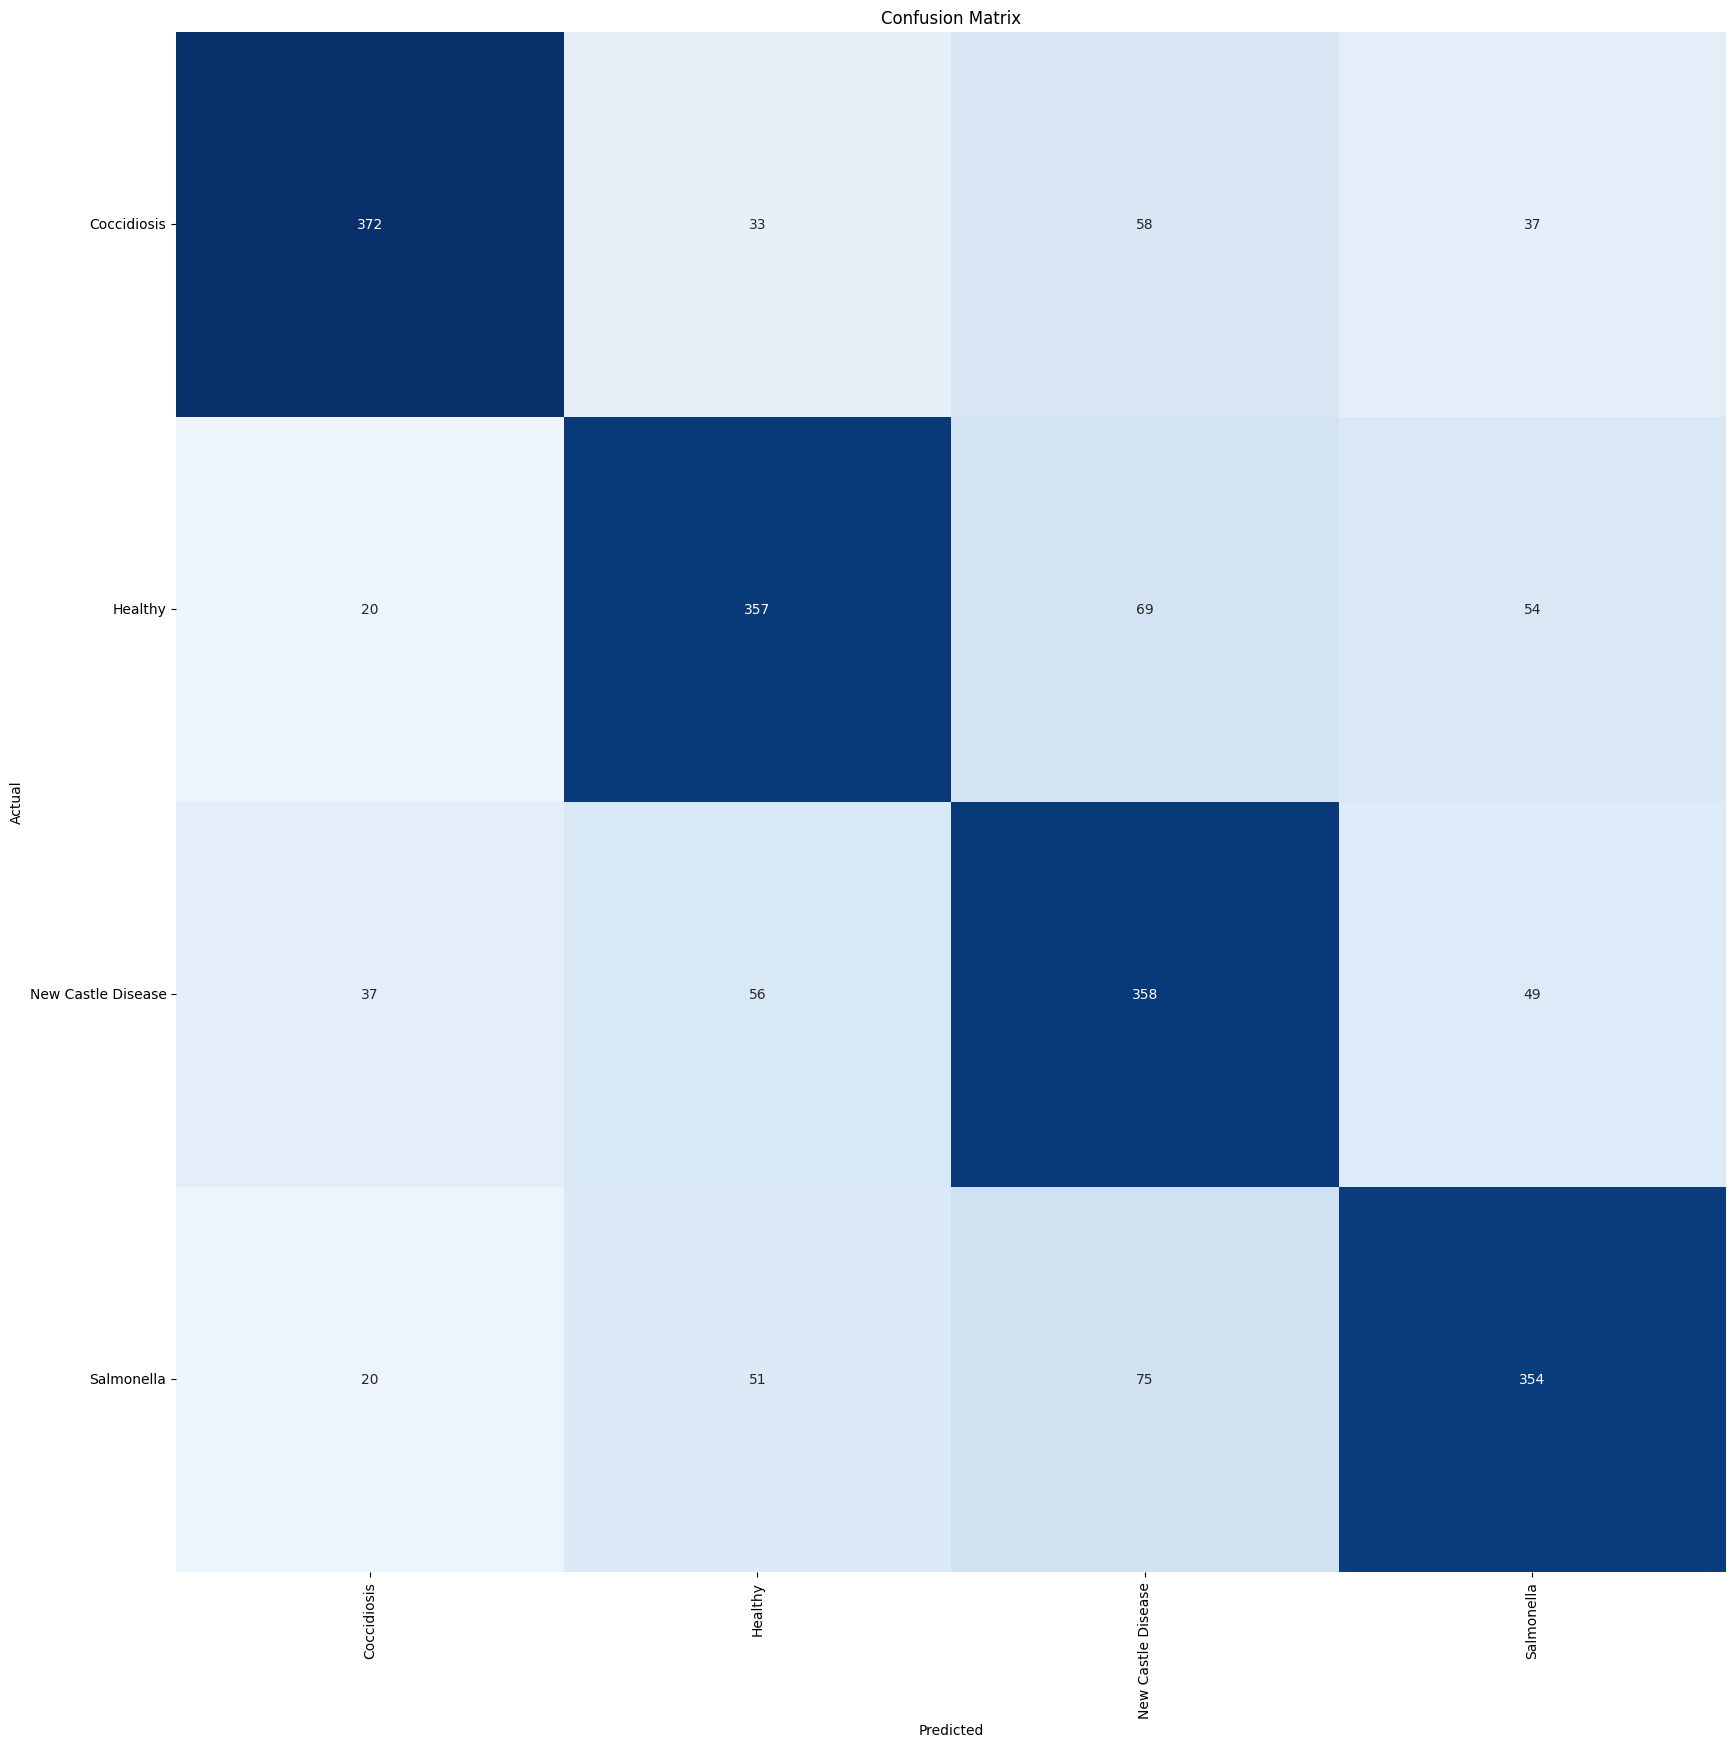

Classification Report:
----------------------



In [ ]:
predictor(model,test_gen)

In [ ]:
from keras.layers import GlobalAveragePooling2D

In [ ]:

pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(
        hp.Int('units', min_value=512, max_value=2048, step=512),
        activation='relu'
    )(x)
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False


    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG', default=1e-3)
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt'
)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


tuner.search(train_gen, epochs=5, validation_data=val_gen, callbacks=[stop_early])


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"""
The optimal number of units in the dense layer is {best_hps.get('units')}
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

model = tuner.hypermodel.build(best_hps)

history = model.fit(train_gen, validation_data=val_gen, epochs=10)

Trial 5 Complete [00h 03m 30s]
val_accuracy: 0.7444999814033508

Best val_accuracy So Far: 0.7444999814033508
Total elapsed time: 00h 13m 53s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
2048              |1536              |units
0.00022717        |0.00013052        |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
14/63 ━━━━━━━━━━━━━━━━━━━━ 19s 389ms/step - accuracy: 0.3803 - loss: 1.6797

In [ ]:
train_gen.class_indices.keys()

dict_keys(['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella'])

In [ ]:
labels = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
def get_model_prediction(image_path):
    img = load_img(image_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x, verbose=0)
    return labels[predictions.argmax()]

In [ ]:
get_model_prediction('/content/data/data/test/Coccidiosis/cocci.1010.jpg_aug42.JPG')

'Coccidiosis'

In [ ]:
get_model_prediction('/content/data/data/test/Healthy/healthy.1005.jpg_aug45.JPG')

'Healthy'

In [ ]:
get_model_prediction('/content/data/data/test/Salmonella/pcrsalmo.103.jpg_aug37.JPG')

'Salmonella'

In [ ]:
get_model_prediction('/content/data/data/test/New Castle Disease/ncd.114.jpg_aug34.JPG')

'New Castle Disease'

In [ ]:
model.save("model.h5")